Name: Pujan Sharma</br>
    ID: 1928447


In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np

Here we are importing the required  libraries an packages.
Tenserflow: TensorFlow is a Python-friendly open source library for numerical computation. TensorFlow bundles together a slew of machine learning and deep learning (aka neural networking) models and algorithms and makes them useful by way of a common metaphor.</br>

keras: Keras is an high-level neural networks APIs</br>

layers: It is used for forming different convulation layers</br>

Conv2D from keras.layers: we’ve imported Conv2D from keras.layers to perform the convolution operation on training image</br>

MaxPooling2D from keras.layers:we’ve imported MaxPooling2D from keras.layers for pooling operation, which is the step — 2 in the process of building a cnn</br>

Flatten: we’ve imported Flatten from keras.layers, which is used for Flattening. It 2 dimensional arrays into a single long continuous linear vector.</br>

Dense: It connects all the neural networks</br>

Sequential: It is for initialising our cnn layer



In [4]:
classifier = Sequential()

# Convolution - extracting appropriate features from the input image.
# Non-Linearity (RELU) - replacing all negative pixel values in feature map by zero.

classifier.add(Conv2D(32, (2, 2), input_shape=(224, 224, 3),
               activation='relu'))

# Pooling: reduces dimensionality of the feature maps but keeps the most important information.

classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer and flattening in order to arrange 3D volumes into a 1D vector.

classifier.add(Conv2D(32, (2, 2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

# Fully connected layers: ensures connections to all activations in the previous layer.

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier = Sequential(): It  initialise our neural network model as a sequential network. There are two basic ways of initialising a neural network, either by a sequence of layers or as a graph.</br>

classifier.add(Conv2D(32, (2, 2), input_shape=(224, 224, 3),activation='relu')): It is forming 2 dimensional convulational layer, which takes images of resolution 224*224 as inputs. relu is taken as activation function here.</br>

classifier.add(MaxPooling2D(pool_size=(2, 2))): It creates max pooling layer.We use a 2x2 window as it’s the most common. By default stride length is equal to the window size, which is 2 in our case, so we don’t change that.its main function is to reduce the size of volume which makes the computation fast reduces memory and also prevents from overfitting.</br>

We again added another convolutional layer.</br>

classifier.add(Flatten()): It converts all the resultant 2 dimensional arrays into a single long continuous linear vector.</br>

Dense:  It is used to perform the full connection of the neural network.



In [34]:
classifier.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
train_imagedata = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
        zoom_range=0.2, horizontal_flip=True)
test_imagedata = ImageDataGenerator(rescale=1. / 255)
training_set = \
    train_imagedata.flow_from_directory('dataset/dataset/train'
        , target_size=(224, 224), batch_size=16, class_mode='binary')
val_set = \
    test_imagedata.flow_from_directory('dataset/dataset/test'
        , target_size=(224, 224), batch_size=16, class_mode='binary')
history=classifier.fit_generator(training_set, steps_per_epoch= 400 // 16, epochs=10,
                         validation_data=val_set,
                         validation_steps=100  // 16)


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 25 steps, validate for 6 steps
Epoch 1/10
25/25 [==============================] - 21s 851ms/step - loss: 0.1737 - accuracy: 0.9350 - val_loss: 0.2730 - val_accuracy: 0.8854
Epoch 2/10
25/25 [==============================] - 21s 835ms/step - loss: 0.1556 - accuracy: 0.9300 - val_loss: 0.3973 - val_accuracy: 0.8438
Epoch 3/10
25/25 [==============================] - 21s 824ms/step - loss: 0.1437 - accuracy: 0.9500 - val_loss: 0.3172 - val_accuracy: 0.8958
Epoch 4/10
25/25 [==============================] - 20s 799ms/step - loss: 0.1494 - accuracy: 0.9475 - val_loss: 0.3116 - val_accuracy: 0.9167
Epoch 5/10
25/25 [==============================] - 21s 830ms/step - loss: 0.1225 - accuracy: 0.9475 - val_loss: 0.2812 - val_accuracy: 0.9062
Epoch 6/10
25/25 [==============================] - 21s 843ms/step - loss: 0.1271 - accuracy: 0.9500 - val_loss:

classifier.compile: Compile function is used here that involve use of loss, optimizers and metrics.here loss function used is binary_crossentropy, optimizer used is adam.</br>

ImageGenerator: Here, ImageDataGenerator  rescales the image, applies shear in some range, zooms the image and does horizontal flipping with the image. This ImageDataGenerator includes all possible orientation of the image. It is necessary to compare different image for classification.</br>

train_imagedata.flow_from_directory: It is used to prepare the data from training dataset directory.</br>


test_imagedata.flow_from_directory: It is used to prepare the data from testing dataset directory.</br>

classifier.fitenerator: fit_generator is used to fit the data into the model.</br>

steps_per_epochs tells us about the number of times the model will execute for the training data in our case 400//16.</br>

epochs tells us the number of times model will be trained in forward and backward pass.</br>

validation_data is used to feed the test data into the model.</br>
validation_steps denotes the number of test samples.</br>

After 10 iteration of the model we can observe
The average accuracy of model in above 90 which is quite good.
The loss is decreasing in every iteration










In [48]:
import numpy as np
import PIL
from PIL import Image
from keras.preprocessing import image
img= Image.open(r'dataset/dataset/test/planes/2.jpg')
img.show()
test_image = image.load_img('dataset/dataset/test/planes/2.jpg', target_size = (224, 224))
test_image
test_image1 = image.img_to_array(test_image)
test_image2= np.expand_dims(test_image1, axis = 0)
result = classifier.predict(test_image2)
training_set.class_indices
if result[0][0] == 0:
 print('car')
else:
 print('plane')
result[0][0]




    

plane


5.5212506e-12

 Here we are uploading file from an image directory and trying to predict if it is a car or plane</br>
 
 image.load_image: loads data from directory for preprocessing</br>
 
 img_to_array: Changes the loaded image into array form </br>
 
 np.expand_dims : It expands the shape of array. axis : 0 shows Position in the expanded axes where the new axis is placed.</br>
 
 then after using our model we get  binary result. If the result is 0 then the image is of car if not then its plane.
 
 
 
 
 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


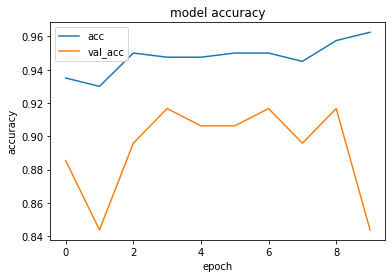

In [41]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

here we are using pyplot to plot the accuracy of model after each epoch.
we can se accuracy is increasing  after most epoch
But val_ accuracy of model is irregular. It is high at middle epochs where as low in begainning and end.
During training, the samples are again split into 2 internal subsets. One which is used for actual training and other which is used for validation after each epoch. val_accuracy shows the accuracy of that validation split data.

By looking at the difference between accuracy and val accuracy we can clearly say this model suffer from overfitting.